In [1]:
import tensorflow as tf
import matplotlib.pyplot as plt

# 주어진 X, Y 값 입력
X = tf.constant([-0.7,-0.5, -0.2, -0.3, 0, 0.5, 1.0, 1.5, 2.0, 2.5, 2.8]) 
Y = tf.constant([0.5, 0.3, 0.2, 0.5, 0.3, 1.9, 2.4, 4.1, 6.8, 7.9, 7.7])

# tf.random.uniform 사용 시
# a0 = tf.Variable(tf.random.uniform([1], -1.0, 1.0))
# a1 = tf.Variable(tf.random.uniform([1], -1.0, 1.0))
# a2 = tf.Variable(tf.random.uniform([1], -1.0, 1.0))
# a3 = tf.Variable(tf.random.uniform([1], -1.0, 1.0))

# tf.random.normal 사용시
a0 = tf.Variable(tf.random.normal([1], 0, 1))
a1 = tf.Variable(tf.random.normal([1], 0, 1))
a2 = tf.Variable(tf.random.normal([1], 0, 1))
a3 = tf.Variable(tf.random.normal([1], 0, 1))

In [2]:
optimizer = tf.compat.v1.train.GradientDescentOptimizer(learning_rate=0.01) # 경사하강법
# optimizer = tf.optimizers.SGD(learning_rate=0.01) # 확률적 경사 하강법
# optimizer = tf.optimizers.Adam(learning_rate=0.7, beta_1=0.9, beta_2=0.999, epsilon=1e-08, amsgrad=False, name='Adam') # Adam optimizer

In [3]:
@tf.function()
def cost_eval():
  # y = a0 + a1*x + a2*x^2 + a3*x^3 (3차 함수)
  # W와 X가 행렬이 아니므로 tf.matmul이 아니라 기본 곱셈 기호를 사용
  hypothesis = a0 + a1*X + a2*X*X + a3*X*X*X
  cost = tf.reduce_mean(tf.square(hypothesis - Y))
  return cost

In [4]:
print("epoch \t a0 \t\t a1 \t\t a2 \t\t a3 \t\t cost")
# 최적화를 10번 수행
for epoch in range(0, 10, 1):
  # 손실함수를 작성
  # mean(h - Y)^2 : 예측값과 실제값의 거리를 비용(손실) 함수로 계산
  
  # 텐서플로우에 기본적으로 포함되어 있는 함수를 이용해 최적화를 수행
  # 비용을 최소화 하는 것이 최종 목표
  optimizer.minimize(cost_eval, var_list=[a0,a1,a2, a3])
  # 손실, 가중치, 편향을 출력
  print(epoch, "\t", a0.numpy(), "\t", a1.numpy(), "\t", a2.numpy(), "\t", a3.numpy(), "\t", cost_eval().numpy())

epoch 	 a0 		 a1 		 a2 		 a3 		 cost
0 	 [-0.26008448] 	 [-1.0184947] 	 [-0.8044487] 	 [1.9092895] 	 76.3249
1 	 [-0.3189267] 	 [-1.2113396] 	 [-1.3272872] 	 [0.48826626] 	 43.292454
2 	 [-0.22414255] 	 [-1.0305604] 	 [-0.9120351] 	 [1.4841125] 	 26.13253
3 	 [-0.24079837] 	 [-1.118719] 	 [-1.1714138] 	 [0.74364954] 	 17.171265
4 	 [-0.1784092] 	 [-1.0140903] 	 [-0.9465779] 	 [1.2511779] 	 12.446323
5 	 [-0.17383116] 	 [-1.0484451] 	 [-1.070218] 	 [0.8622945] 	 9.911748
6 	 [-0.12870665] 	 [-0.9833803] 	 [-0.9439876] 	 [1.1178751] 	 8.511046
7 	 [-0.11369343] 	 [-0.9901969] 	 [-0.9978258] 	 [0.9107033] 	 7.698631
8 	 [-0.07800201] 	 [-0.94579905] 	 [-0.9227875] 	 [1.0363746] 	 7.192709
9 	 [-0.05811025] 	 [-0.93863267] 	 [-0.94085974] 	 [0.9232012] 	 6.847687


In [5]:
print("=== Test ===")
x = 5.
print('X:', x, 'Y:', (a0 + a1*X + a2*X*X + a3*X*X*X).numpy())
x = 2.5
print('X:', x, 'Y:', (a0 + a1*X + a2*X*X + a3*X*X*X).numpy())

=== Test ===
X: 5.0 Y: [-0.17874667  0.06059101  0.08459629  0.11387573 -0.05811025 -0.6472414
 -1.0144014  -0.4671893   1.6867952   6.1399536  10.203491  ]
X: 2.5 Y: [-0.17874667  0.06059101  0.08459629  0.11387573 -0.05811025 -0.6472414
 -1.0144014  -0.4671893   1.6867952   6.1399536  10.203491  ]


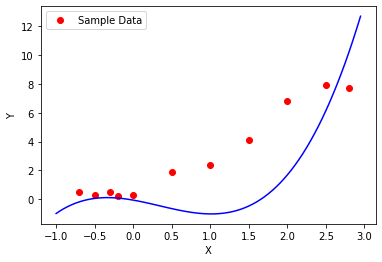

In [6]:
# 그래프를 그리기 위해 새로운 X값을 입력
new_X = tf.range(-1, 3, 0.05) # 문제에서 주어진 값 입력
# 선형 회귀직선을 이용하여 예측 Y값 계산
new_Y = a0 + a1*new_X + a2*new_X*new_X + a3*new_X*new_X*new_X

plt.plot(X, Y, 'ro', label='Sample Data') # 'ro'는 red circle
plt.plot(new_X, new_Y, 'b-')
plt.xlabel('X')
plt.ylabel('Y')
plt.legend()
plt.show()